# 기술 통계 내용보기

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [54]:
d1 = pd.read_table('ratio.txt')
print type(d1)
scipy.stats.normaltest(d1)

<class 'pandas.core.frame.DataFrame'>


NormaltestResult(statistic=array([ 14.62116285]), pvalue=array([ 0.00066843]))

In [29]:
#d = pd.read_table('ratio.txt', index_col = 0)
d = np.array([0.693, 0.662, 0.69, 0.606, 0.57, 0.749, 0.672, 0.628, 0.609, 0.844, 0.654,
              0.615, 0.668, 0.601, 0.576, 0.67, 0.606, 0.611, 0.553, 0.933])
stat_des = scipy.stats.describe(d)
print stat_des
print stat_des[0]
print stat_des.nobs

DescribeResult(nobs=20, minmax=(0.55300000000000005, 0.93300000000000005), mean=0.66050000000000009, variance=0.0085582631578947389, skewness=1.6138087546334552, kurtosis=2.3033374843482433)
20
20


In [30]:
n, mm, m, v, sk, kt = scipy.stats.describe(d)
print n, m
print np.median(d)

print scipy.stats.percentileofscore(d, 0.6215)

20 0.6605
0.641
45.0


# Quantiles and cumulative distribution

In [31]:
print 'norm---------------------'
print scipy.stats.norm.cdf(1.96, loc=0, scale=1)
print scipy.stats.norm.ppf(0.95, loc=0, scale=1)
print 't------------------------'
print scipy.stats.t.cdf(1.96, df=30)
print scipy.stats.t.ppf(0.95, df=30)
print 'chi----------------------'
print scipy.stats.chi.cdf(4.84, df=10)
print scipy.stats.chi.ppf(0.95, df=10)
print 'f------------------------'
print scipy.stats.f.cdf(3.48, dfn=1, dfd=30) # 3.48
print scipy.stats.f.ppf(0.95, dfn=1, dfd=30) # dfn-numerator, dfd-denominator

norm---------------------
0.975002104852
1.64485362695
t------------------------
0.970328843552
1.69726089436
chi----------------------
0.990719923349
4.27867246389
f------------------------
0.928078661465
4.17087678577


# Normality test

In [39]:
ag = scipy.stats.normaltest(d)
print ag, '\n'
sp = scipy.stats.shapiro(d)
print sp

NormaltestResult(statistic=14.621162848377281, pvalue=0.0006684282986861948) 

(0.8284037113189697, 0.0023661439772695303)


# Random number generator - Sampling

In [40]:
alea1 = scipy.stats.norm.rvs(loc=0, scale=1, size=30)
print scipy.stats.normaltest(alea1), '\n'
alea2 = scipy.stats.expon.rvs(size=30)
print scipy.stats.normaltest(alea2), '\n'
alea3 = np.random.normal(loc=0, scale=1, size=30)
print scipy.stats.normaltest(alea3), '\n'

NormaltestResult(statistic=2.196258430697779, pvalue=0.33349439667264208) 

NormaltestResult(statistic=24.410247926694964, pvalue=5.0047456616198444e-06) 

NormaltestResult(statistic=1.3399677003933244, pvalue=0.51171684184617139) 



In [43]:
df1 = np.random.choice(d, size=5, replace=False)
df2 = np.random.choice(d, size=5, replace=True)
print df1, '\n'
print df2

[ 0.606  0.628  0.749  0.654  0.662] 

[ 0.609  0.654  0.606  0.672  0.67 ]


# ttest

In [55]:
# 1표본일 때, 가설검증은 
# h0: 모평균 = xx / h1: 모평균 != xx
# 이렇게 하기 때문에 모평균에 대한 입력이 필요
print scipy.stats.ttest_1samp(d, popmean=0.618), '\n'
m = np.mean(d)
print m

Ttest_1sampResult(statistic=2.0545234833761663, pvalue=0.05394132733308659)
0.6605


In [58]:
import math
sigma = np.std(d, ddof=1)
t = (m - 0.618) / (sigma / np.sqrt(d.size))
print t, '\n'
# 단측 검정
# math.fabs(t) - 절대값 구하기 / np.abs(t)와 동일
p = 2.0 * (1.0 - scipy.stats.t.cdf(math.fabs(t), d.size - 1))
print p

2.05452348338 

0.0539413273331


In [78]:
# p = 0.975, df = 19일 때 t 값
scipy.stats.t.ppf(0.975, 19)

2.093024054408263

In [59]:
# t = 2.054, df = 19일 때 p값은(꼬리부분)?
scipy.stats.t.cdf(math.fabs(t), d.size - 1)

0.97302933633345667

In [62]:
2.0 * (1.0 - scipy.stats.t.cdf(t, 19))

0.053941327333086653

# 평균비교 t-test

In [73]:
dt = np.array([24, 43, 58, 71, 43, 49, 61, 44, 67, 49, 
               53, 56, 59, 52, 62, 54, 57, 33, 46, 43, 57])
dc = np.array([42, 43, 55, 26, 62, 37, 33, 41, 19, 54, 
               20, 85, 46, 10, 17, 60, 53, 42, 37, 42, 55, 28, 48])
'''dt = np.array([24,43,58,71,43,49,61,44,67,49,53,56,59,52,62,54,57,33,46,43,57])
dc = np.array([42,43,55,26,62,37,33,41,19,54,20,85,46,10,17,60,53,42,37,42,55,28,48])'''

'dt = np.array([24,43,58,71,43,49,61,44,67,49,53,56,59,52,62,54,57,33,46,43,57])\ndc = np.array([42,43,55,26,62,37,33,41,19,54,20,85,46,10,17,60,53,42,37,42,55,28,48])'

In [74]:
print scipy.stats.ttest_ind(dt, dc), '\n'
print scipy.stats.ttest_ind(dt, dc, equal_var=False), '\n'
print scipy.stats.bartlett(dt, dc)

Ttest_indResult(statistic=2.2665515995859429, pvalue=0.028629482832245753) 

Ttest_indResult(statistic=2.3108891978542281, pvalue=0.026382412824424779) 

BartlettResult(statistic=3.8455356421051388, pvalue=0.049878587395117857)


# paired sample test

In [75]:
d1968 = np.array([0.42,0.5,0.52,0.45,0.43,0.55,0.45,0.34,0.45,0.54,0.42,0.51,0.49,0.54,0.5,0.58,0.49,0.56,0.63])
d1972 = np.array([0.45,0.5,0.52,0.45,0.46,0.55,0.60,0.49,0.35,0.55,0.52,0.53,0.57,0.53,0.59,0.64,0.5,0.57,0.64])

In [83]:
# 모수적 방법
print scipy.stats.ttest_rel(d1968, d1972), '\n'
# 비모수적 방법
print scipy.stats.wilcoxon(d1968, d1972), '\n'
# 정규성 검정
# The Jarque-Bera test tests 
# whether the sample data has the 
# skewness and kurtosis matching a normal distribution.
# return value: (test statistics, p-value)
print scipy.stats.jarque_bera(d1968)
print scipy.stats.jarque_bera(d1972)

Ttest_relResult(statistic=-2.4577038156018021, pvalue=0.024352597586836344) 

WilcoxonResult(statistic=16.0, pvalue=0.012224112319788901) 

(0.092812803110483719, 0.95465391050970339)
(0.90538184413134448, 0.63591465044191153)


# correlation

In [86]:
#two vectors for correlation and regression (without North Ireland)
dalc = np.array([6.47,6.13,6.19,4.89,5.63,4.52,5.89,4.79,5.27,6.08])
dtob = np.array([4.03,3.76,3.77,3.34,3.47,2.92,3.2,2.71,3.53,4.51])

#Pearson’s correlation # 정규성
print(scipy.stats.pearsonr(dalc,dtob)), '\n'
#Spearman’s rank correlation # 정규분포를 따르지 않을 때
print(scipy.stats.spearmanr(dalc,dtob)), '\n'
#Kendall’s tau coefficient based on concordant and discordant pairs # 순위쌍
print(scipy.stats.kendalltau(dalc,dtob)), '\n'
#simple linear regression
print(scipy.stats.linregress(dalc,dtob)), '\n'

(0.78428732015386771, 0.0072343583517295021) 

SpearmanrResult(correlation=0.83030303030303021, pvalue=0.0029402270232795065) 

KendalltauResult(correlation=0.6444444444444446, pvalue=0.0094910979584626725) 

LinregressResult(slope=0.61150129146472409, intercept=0.10815378587805125, rvalue=0.7842873201538676, pvalue=0.007234358351729509, stderr=0.17102020517368527) 



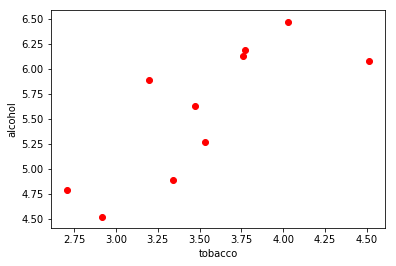

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dtob, dalc, color='r')
plt.xlabel('tobacco')
plt.ylabel('alcohol')

# anova

In [103]:
print np.std(dbeef)
print np.std(dmeat)
print np.std(dpoultry)

99.8410111127
91.0695388132
82.2092022901


In [104]:
print np.mean(dbeef)
print np.mean(dmeat)
print np.mean(dpoultry)

401.15
418.529411765
459.0


In [107]:
scipy.stats.ttest_ind(dbeef, dpoultry)

Ttest_indResult(statistic=-1.8506905729456689, pvalue=0.07266906372841167)

In [97]:
#salt – 3 independent samples
# 소고기핫도그, 돼지고기핫도그, 닭고기핫도그의 나트륨 + 칼로리 함량
dbeef = np.array([495,477,425,322,482,587,370,322,479,375,330,300,386,401,645,440,317,319,298,253])
dmeat = np.array([458,506,473,545,496,360,387,386,507,393,405,372,144,511,405,428,339])
dpoultry = np.array([430,375,396,383,387,542,359,357,528,513,426,513,358,581,588,522,545])

#comparing variances
print(scipy.stats.levene(dbeef,dmeat,dpoultry)), '\n'

#comparing means - one way anova - parametric
print(scipy.stats.f_oneway(dbeef,dmeat,dpoultry)), '\n'
#Kruskal-Wallis test – one way anova on ranks – non-parametric
print(scipy.stats.kruskal(dbeef,dmeat,dpoultry))

# At 5% level, the contents in salt of the hot dogs are not different.

LeveneResult(statistic=0.24943197044211946, pvalue=0.7801883296333626) 

F_onewayResult(statistic=1.7777910697271164, pvalue=0.17932466808492342) 

KruskalResult(statistic=4.7128082695637135, pvalue=0.094760356763514311)


# statsmodel(회귀분석)

In [108]:
# statsmodels.api와 statsmodels.formula.api의 차이
import numpy as np
import statsmodels.api as sm

# Generate artificial data (2 regressors + constant)
# nobs => 데이터 개수
nobs = 100
# 100행, 2열로 출력
X = np.random.random((nobs, 2))
# 파이썬에서 회귀분석시 상수 추가가 필요하다(하지 않으면 올바른 결과가 나오지 않음)
X = sm.add_constant(X)

beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     11.87
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           2.45e-05
Time:                        11:45:24   Log-Likelihood:                -17.323
No. Observations:                 100   AIC:                             40.65
Df Residuals:                      97   BIC:                             48.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4666      0.074     19.794      0.0

In [129]:
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [130]:
scipy.stats.normaltest(dat['Pop1831'])

NormaltestResult(statistic=36.626174496340369, pvalue=1.113594972312434e-08)

In [109]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 03 Mar 2017   Prob (F-statistic):           1.90e-08
Time:                        11:45:34   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

# statsmodels(anova)

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
Description
The Moore data frame has 45 rows and 4 columns. 
The data are for subjects in a social-psychological experiment, 
who were faced with manipulated disagreement from a partner of either of low or high status. 
The subjects could either conform to the partner's judgment or stick with their own judgment.

This data frame contains the following columns:

partner.status
    Partner's status. A factor with levels: high, low.

conformity
    Number of conforming responses in 40 critical trials.

fcategory
    F-Scale Categorized. A factor with levels (note levels out of order): high, low, medium.

fscore
    Authoritarianism: F-Scale score.

In [134]:
data.head()

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [158]:
#pd.value_counts(data.partner_status)
data[['partner_status', 'fcategory']].apply(pd.value_counts).fillna(0)

,partner_status,fcategory
high,23,15
low,22,15
medium,0,15


In [133]:
# car package의 Moore data
# R style
# install.packages('car')
# library(car)
# data('Moore')
# head(Moore)
moore = sm.datasets.get_rdataset("Moore", "car", cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status":"partner_status"}) # make name pythonic

# 이원분산분석 (초점이 되는 것은 상호작용항의 유의성)
# h0: 순응정도에 대해 권위주의 정도(상, 중, 하)와 상대방의 지위(자신보다 높음, 낮음)간에는 상호작용효과가 없다
# h0: 권위주의 정도와 상대방의 지위에 따라 순응정도는 차이가 없다
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
table

# partner_status와 fcategory간의 상호작용효과는 f=4.184, p=0.02 -> 유의함

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2,4.184623,0.022572
Residual,817.763961,39,NaN,NaN


# patsy의 이해

In [ ]:
'''
I -- 타입보호
Q -- 공백이 있는 문자열 보호(formula 내에서)
np.log -- formula내에서 데이터 변환
~ -- lowest predence(bind most loosely)
** -- highest predence(bind most tightly)
: -- 상호작용
* -- a+b, a:b의 의미
/ -- a + a:b의 의미
'''

In [159]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

In [182]:
np.random.seed(123456789)
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T

beta, res, rank, sval = np.linalg.lstsq(X, y)
print beta
print res
print rank
print sval

[ -5.55555556e-01   1.88888889e+00  -8.88888889e-01  -1.33226763e-15]
[]
3
[  2.48531012e+02   5.13072310e+00   1.07813150e-01   3.00329500e-16]


In [162]:
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)
model = sm.OLS(y, X)
result = model.fit()
result.params

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -1.66533454e-15])

In [163]:
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
model = sm.OLS(y, X)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.665335e-15
dtype: float64

In [170]:
from collections import defaultdict
data = defaultdict(lambda: np.array([]))
print patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names
print patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names
print patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names, '\n'
print patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names
print patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names
print patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a']
['Intercept', 'a', 'b']
['a', 'b'] 

['Intercept', 'a', 'b', 'a:b']
['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']
['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']


In [171]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
print patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names
print patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names, '\n'
print patsy.dmatrices("y ~ a**2", data=data)[1].design_info.term_names
print patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']
['Intercept', 'I(a + b)'] 

['Intercept', 'a']
['Intercept', 'np.log(a)', 'b']


In [172]:
# Or we can even transform variables with arbitrary Python functions:
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

In [173]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1,0,0
1,0,1,0
2,0,0,1


In [184]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
print patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]
print patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]
#print patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names, '\n'
#print patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names
#print patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

   a[type A]  a[type B]  a[type C]
0          1          0          0
1          0          1          0
2          0          0          1
   C(a, Poly).Constant  C(a, Poly).Linear  C(a, Poly).Quadratic
0                    1      -7.071068e-01              0.408248
1                    1      -5.551115e-17             -0.816497
2                    1       7.071068e-01              0.408248


In [185]:
data = {k: np.array([]) for k in ['y', 'a', 'b', 'c']}
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ a**2", data=data)[1].design_info.term_names

['Intercept', 'a']

# 이원배치 분산분석

In [3]:
moore1 = sm.datasets.get_rdataset("Moore", "car", cache=True) # load data

In [4]:
mdata = moore1.data
mdata = mdata.rename(columns={"partner.status":"partner_status"}) # make name pythonic
mdata.head()

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [21]:
mdata.pivot_table('conformity', index=['partner_status'], columns=['fcategory'], aggfunc=len)

fcategory,high,low,medium
partner_status,,,
high,7,5,11
low,8,10,4


In [20]:
mdata.groupby(['partner_status', 'fcategory'])['conformity'].count().unstack()

fcategory,high,low,medium
partner_status,,,
high,7,5,11
low,8,10,4
